**Introduction to Machine Learning**

ECE 580, Spring 2022

`HW #1`

**Fakrul Islam Tushar**

Submission:01/28/ 10.00 PM

Due:01/28/2022, 11.59 PM.




## Install/Import Libraries

For running home-work 1 code we will need following python libraries:



1.   numpy , ref: https://pypi.org/project/numpy/
2.   Pandas, ref: https://pypi.org/project/pandas/
3.   Seaborn,ref: https://pypi.org/project/seaborn/
4.   Mathplotlib, ref:https://pypi.org/project/matplotlib/
5.   scikit-learn, ref:https://pypi.org/project/scikit-learn/





In [ ]:
# if the libaries aren't istall install and import
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install scikit-learn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from google.colab import files 
#import warnings
#warnings.filterwarnings("ignore")

# Data Preparation and Exploration

**Instruction:** Download the Automobile Data Set from the UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/machine-learning-databases/autos/) Although there are several potential uses of this data set, we are going to use this data to predict a car’s price from its characteristics.
For the time being, we are going to restrict ourselves to the **13 continuous predictor variables** (in the order
in which they appear in the data base): **wheel-base, length, width, height, curb-weight, engine-size, bore,
stroke, compression-ratio, horsepower, peak-rpm, city-mpg, and highway-mpg**.

## **Question # 1(a)**

Document (list) the steps you take to clean this data set, including removing the (non-continuous)
features that are not of interest, and removing any data points for which the target variable (price)
is unknown. The documentation should include the number of data points that are removed at
each step (do not list the removed data points themselves), and conclude with a statement as to
the number of data points that remain after cleaning the data set.



**Answer:** 

 * First we need to the download from the from the UCI machine learning dataset website (https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data), add the column header and constarct the dataset.



In [ ]:
# dataset download link
automobile_dataset_filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'             
# dataset columns header
automobile_dataset_headers  = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors",
                               "body-style","drive-wheels","engine-location","wheel-base", "length","width","height",
                               "curb-weight","engine-type","num-of-cylinders", "engine-size","fuel-system","bore",
                               "stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

#- RAW Automobile dataset
automobile_dataset_df = pd.read_csv(automobile_dataset_filename, names = automobile_dataset_headers)
#--Raw Dataset Statististics
print('-- Raw Dataset details and Statististics --\n')
rows = len(automobile_dataset_df.axes[0]) # Get the number of rows
cols = len(automobile_dataset_df.axes[1]) # Get the number of columns
  
# Print the number of rows and columns
print('Dataset Name      :Automobile Data Set')
print('Source            :https://archive.ics.uci.edu/ml/datasets/Automobile')

print("Number of Rows    :" + str(rows))
print("Number of Columns :" + str(cols))
print('\n')
#automobile_dataset_df.dtype
print("Column Names & types:")
print(automobile_dataset_df.dtypes)

-- Raw Dataset details and Statististics --

Dataset Name      :Automobile Data Set
Source            :https://archive.ics.uci.edu/ml/datasets/Automobile
Number of Rows    :205
Number of Columns :26


Column Names & types:
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


### Data Preparation and Cleaning.


1.  **Raw Automobile dataset has `205 rows and 26 colums`.**
(DataFrame obj: automobile_dataset_df)

2. **Selecting 13 predictive variable/feature for price prediction and removing all other features.** 13 predictive variable/feature are following: wheel-base, length, width, height, curb-weight, engine-size, bore,
stroke, compression-ratio, horsepower, peak-rpm, city-mpg, and highway-mpg. (DataFrame obj: automobile_dataset_13PV_1TV_df)

`After step 2, New Automobile dataset: 205 rows, 14 columns (13 predictive + 1 target feature)`.


3.   **Checked the missing values.**: Our Analysis shows following column has misisng values.
*   Column: bore,         Missing Values =  4
*   Column: stroke,       Missing Values =  4
*   Column: horsepower,   Missing Values =  4
*   Column: peak-rpm,     Missing Values =  2
*   Column: price,        Missing Values =  4

4. **Droping 10 Rows having missing values.** `Cleand dataset has 195 rows and 14 columns`

5. Finally converted the datatypes to float.

Finally the **cleaned Automobile datase**t has 195 samples with 14 columns(13 predictive variables + 1 target variable). To constract the cleaned dataset, 12 not of interest predictive valiable colum was removed and afterward 10 rows was excluded due to missing values.






In [ ]:
#--Functions


def check_and_print_numof_Nan_from_df(roi_df):
  """ inputs: a) roi_df= dataframe
      output: print the number of NaN/missing values in teh dataset per columns
  """
  #-| Replacing ? with NaN
  roi_df.replace("?", np.nan, inplace = True)
  #-| Converting to a Boolean df True/False
  missing_data_bool_df          = roi_df.isnull()
  missing_data_bool_df_colnames = missing_data_bool_df.columns.values.tolist()

  for column in missing_data_bool_df_colnames:
    print('Column={:17s} | NaN: False={:3d},True={:3d}'.format(column, (~missing_data_bool_df[column]).values.sum(),missing_data_bool_df[column].values.sum()))


  return


print('|-Data preparation and cleaning\n')


#| (1) Raw Automobile dataset
Raw_automobile_dataset_df        = automobile_dataset_df

#| (2) Removed the features of non interest and make a modified automobile dataset (automobile_dataset_13PV_1TV_df)
#  with 3 predictive feature and 1 target feature (price).
automobile_dataset_13PV_1TV_df   = Raw_automobile_dataset_df[["wheel-base", "length","width","height",
                               "curb-weight", "engine-size","bore",
                               "stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]]
print('1. Raw Automobile Datset')
print('Number of Rows={:3d},Columns={:3d}\n'.format(len(Raw_automobile_dataset_df.axes[0]),len(Raw_automobile_dataset_df.axes[1])))

print('2. Removed 12 non of interest predictive variable columns')
print('Modified Datset Number of Rows={:3d},Columns={:3d}'.format(len(automobile_dataset_13PV_1TV_df.axes[0]),len(automobile_dataset_13PV_1TV_df.axes[1])))


#| (3) Identify missing values
print('\n')
print('3. Checking the missing values')
check_and_print_numof_Nan_from_df(automobile_dataset_13PV_1TV_df)

print('\n')
print('4. Remove the Rows with missing values')
#| (4) Removed the Rows having missing values

#-Replacing ? with NaN
automobile_dataset_13PV_1TV_df.replace("?", np.nan, inplace = True)
#-simply drop whole row having any missing value
Clean_automobile_dataset_13PV_1TV_df=automobile_dataset_13PV_1TV_df.dropna() 
#-Reset index, because we have droped few rows
Clean_automobile_dataset_13PV_1TV_df.reset_index(drop=True,inplace=True)
print('Cleand dataset Datset Number of Rows={:3d},Columns={:3d}'.format(len(Clean_automobile_dataset_13PV_1TV_df.axes[0]),len(Clean_automobile_dataset_13PV_1TV_df.axes[1])))
print('-Now cross check if there is any missing values')
check_and_print_numof_Nan_from_df(Clean_automobile_dataset_13PV_1TV_df)

print('.5 Converted all continues data point to dtype float')
Clean_automobile_dataset_13PV_1TV_df = Clean_automobile_dataset_13PV_1TV_df.astype(float)

|-Data preparation and cleaning

1. Raw Automobile Datset
Number of Rows=205,Columns= 26

2. Removed 12 non of interest predictive variable columns
Modified Datset Number of Rows=205,Columns= 14


3. Checking the missing values
Column=wheel-base        | NaN: False=205,True=  0
Column=length            | NaN: False=205,True=  0
Column=width             | NaN: False=205,True=  0
Column=height            | NaN: False=205,True=  0
Column=curb-weight       | NaN: False=205,True=  0
Column=engine-size       | NaN: False=205,True=  0
Column=bore              | NaN: False=201,True=  4
Column=stroke            | NaN: False=201,True=  4
Column=compression-ratio | NaN: False=205,True=  0
Column=horsepower        | NaN: False=203,True=  2
Column=peak-rpm          | NaN: False=203,True=  2
Column=city-mpg          | NaN: False=205,True=  0
Column=highway-mpg       | NaN: False=205,True=  0
Column=price             | NaN: False=201,True=  4


4. Remove the Rows with missing values
Cleand dataset Da

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## Question # 1(b)
In a future assignment, you will explore systematic feature (predictor variable) selection. For
now, you are going to select features you believe are most promising via data exploration.
For each of the 13 continuous predictor variables (features), plot the target variable (price) as a
function of the predictor variable (feature) using a scatter plot.3 (This will produce 13 scatter
plots, one for each feature.)

**Answer:**



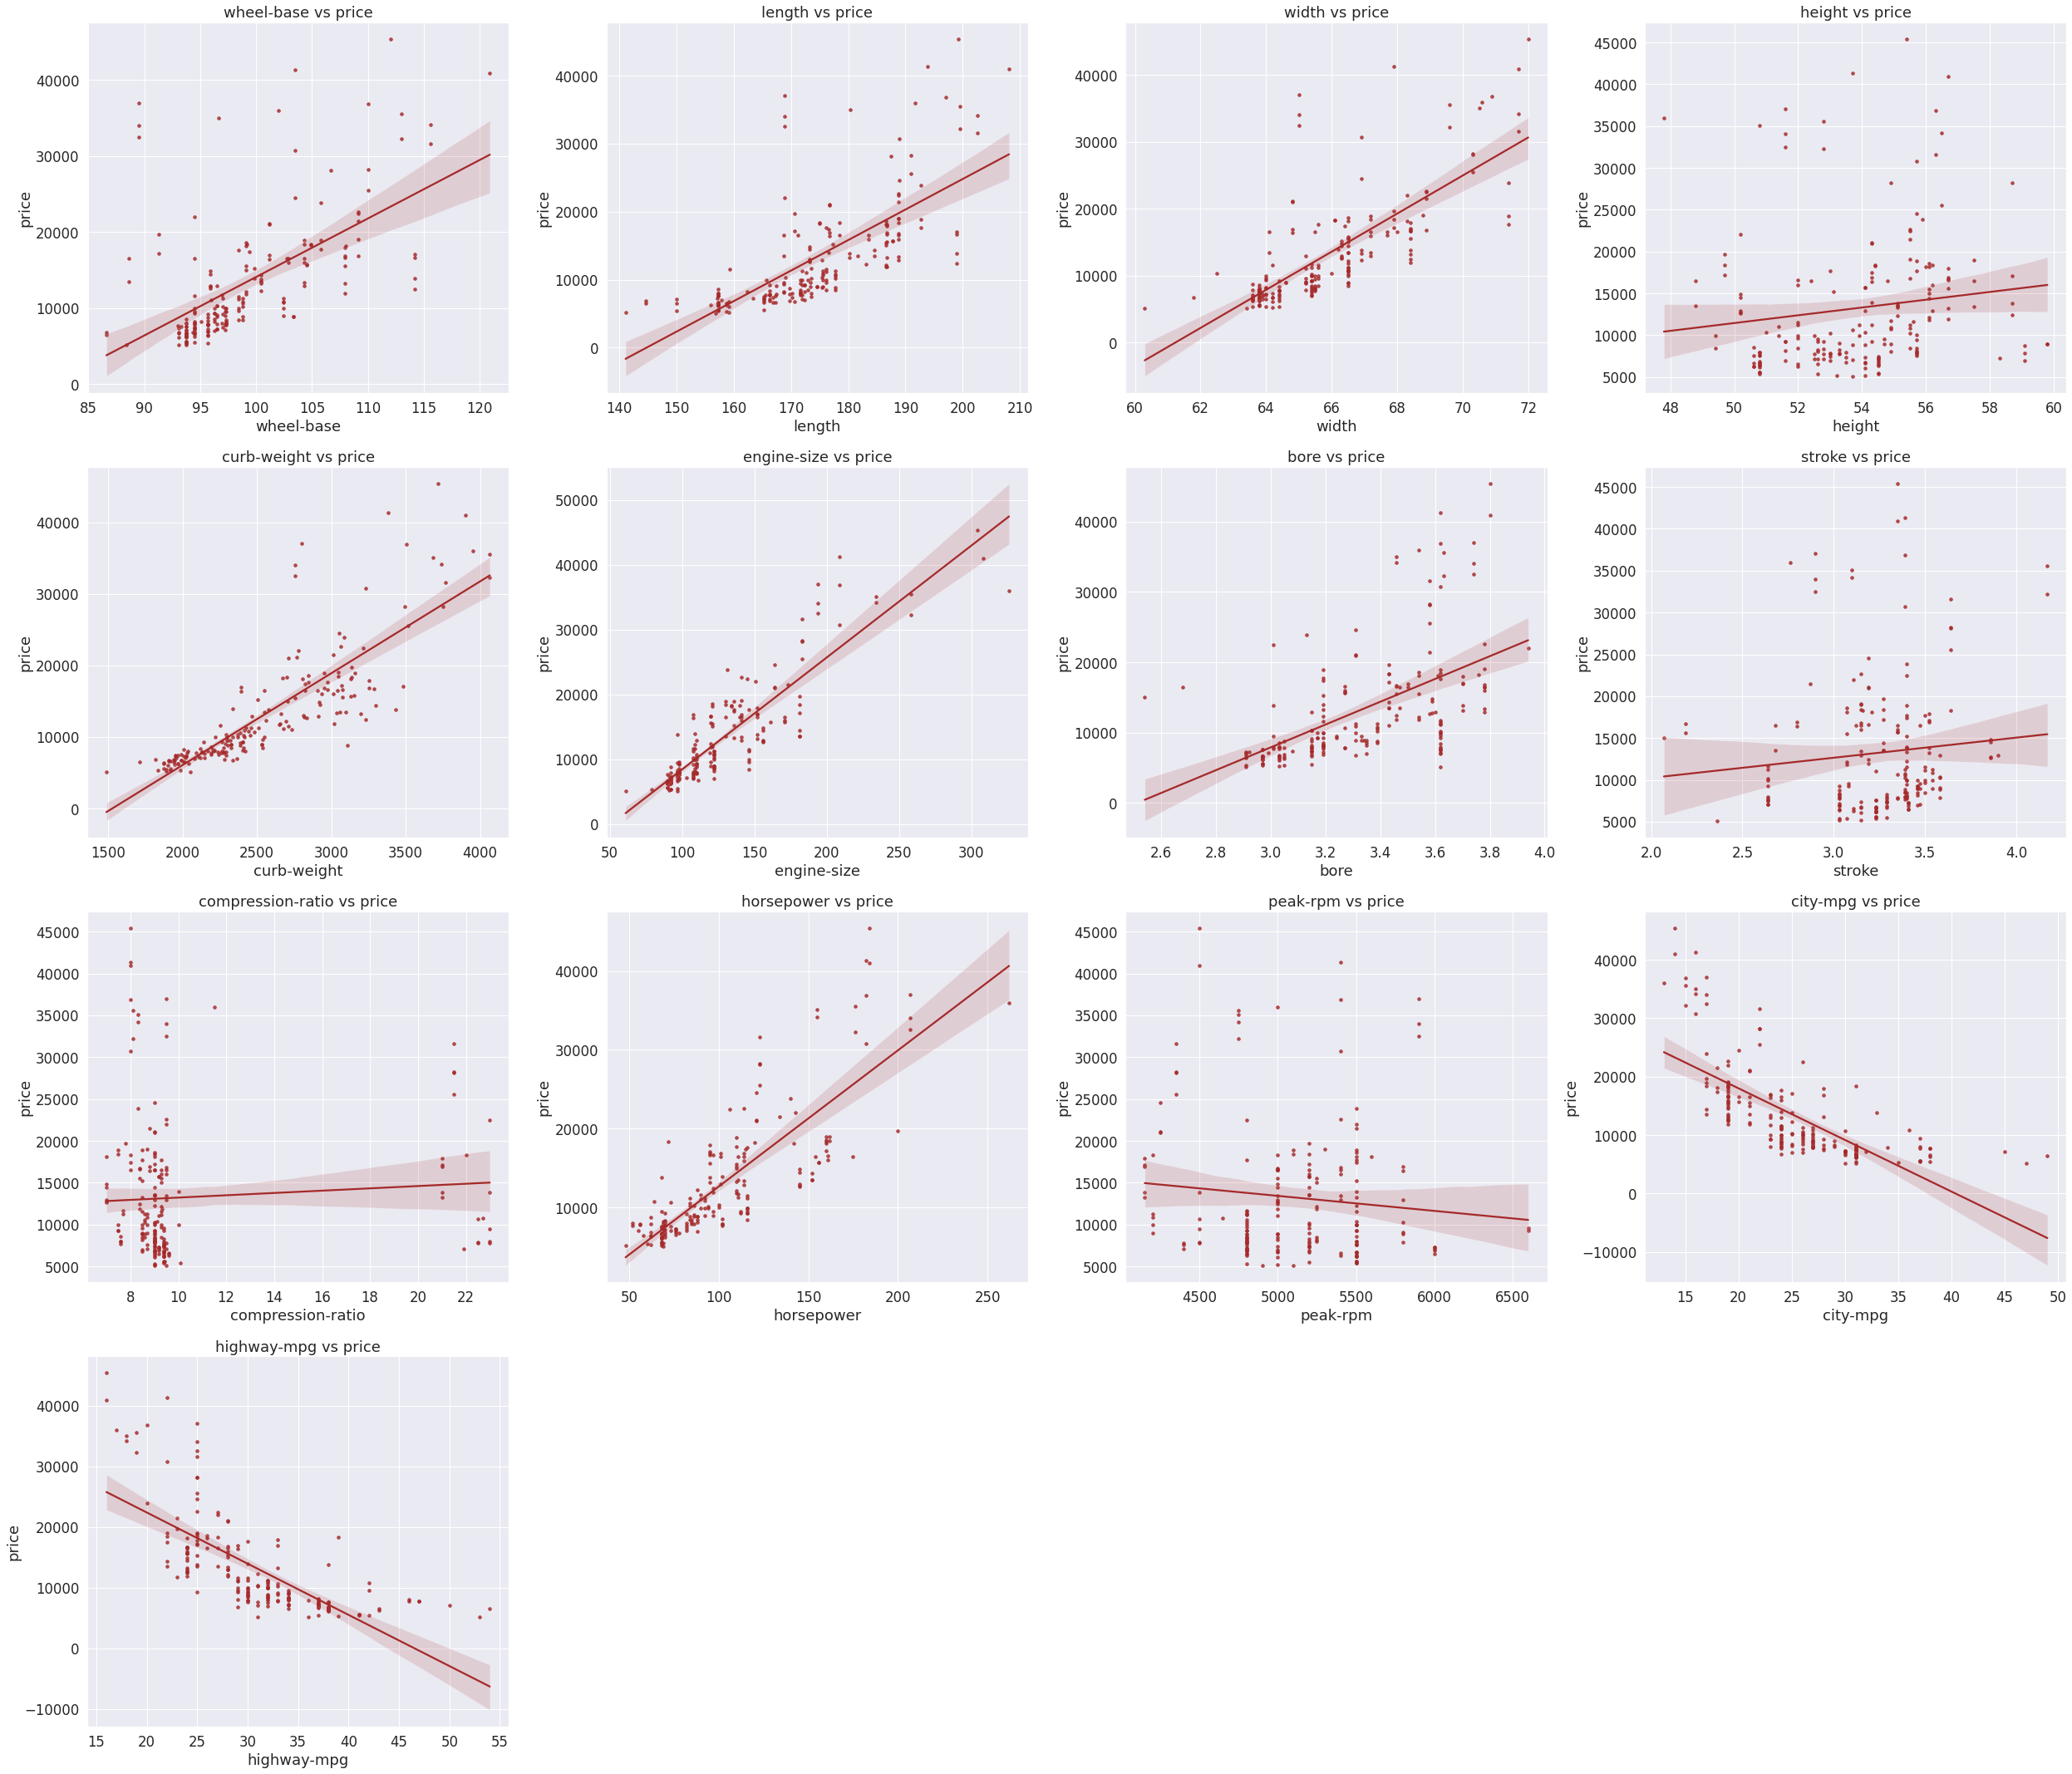

In [ ]:
#-- Function

def plot_PV_vs_Target_plots_from_df(roi_df,target_variable_name,number_of_colums,
                                    fig_size,
                                    fig_save_name='fig.png',
                                    save_fig=False):
  """
  inputs: a) roi_df               = dataframe ;                         dtype:dataframe object)
          b) target_variable_name = Name of the target column;          dtype: string
          c) number_of_colums     = Number of columns you want in a subplot; dtype: int 
          4) fig_size             = Define the size of the figure;           dtype: (int,int)
          5)fig_save_name         = if saving the figute provide name;       dtype: string
          6)save_fig              = save fig or no;                          dtype: bool                     


  """
  # getting column/predictive variable names from the df
  name_of_predictive_variable   = roi_df.columns.values.tolist()
  # removing the target variable name from the column list
  name_of_predictive_variable.remove(target_variable_name)

  #Computing the Sub-plot size
  number_of_predictive_variables = len(name_of_predictive_variable)
  subplot_number_of_colums = number_of_colums
  subplot_number_of_rows   = math.ceil(number_of_predictive_variables/subplot_number_of_colums)
  sns.set(font_scale=1.5)
  # Subplot  
  fig = plt.figure(figsize=fig_size)
  # loop through each of the subplot location and plot predictive Vs target variable
  for subplot_count in range(0,number_of_predictive_variables):
    ax = fig.add_subplot(subplot_number_of_rows, subplot_number_of_colums, subplot_count+1)
    # Using the Seaborn library function: seaborn.regplot () , ref: https://seaborn.pydata.org/generated/seaborn.regplot.html
    # This function plot data and a linear regression model fit.
    sns.regplot(x=name_of_predictive_variable[subplot_count], y=target_variable_name, data=roi_df, color='brown', marker='.', scatter_kws={'s': 50},ax=ax)
    ax.set_title('{} vs price'.format(name_of_predictive_variable[subplot_count]))
  plt.tight_layout()
  #-if saving the figure
  if save_fig:
    plt.savefig(fig_save_name,bbox_inches="tight",dpi=300)
    files.download(fig_save_name) 
  plt.show()
  return

plot_PV_vs_Target_plots_from_df(roi_df=Clean_automobile_dataset_13PV_1TV_df,target_variable_name='price',number_of_colums=4,fig_size=(35,30),fig_save_name='Automobile_dataset_13predictiveFeatures_Vs_price.png',save_fig=False)



## Question # 1(c)
For each of the 13 features, explain, based on your scatter plots, why you believe that feature holds
promise for predicting a car’s price, or why you believe it does not hold promise for predicting
a car’s price. You may notice that for some features there appears to be a nonlinear relationship between the feature and the car’s price. For example, price = feature2, or price = 1/feature. Keep
this in mind when you propose candidate models for predicting a car’s price. (There should be
13 explanations, one for each feature.)


**Answer:** Features relation to price listed below.


1.   **"wheel-base" and "price":** **Medium positive relation.** As we can see when the wheel-base goes high up, the prices also goes up. The points are not tightly but in wide spread position that is why , wheel-base could be a potential predictor of price.

2. **"length" and "price":** **Medium positive relation.** As we can see when the length goes high up, the prices also goes up. Although the points on the scatter plot are not as tightly spread to form a strong positive linear relation. length could be a potential predictor of price.

3. **"width" and "price":** **Medium positive relation.** Similar to length, we can see when the width goes high up, the prices also goes up. Although the points on the scatter plot are not as tightly spread to form a strong positive linear relation. width could be a potential predictor of price.

4. **"height" and "price":** **No relation.** As we can see the regression line is almost a horizontal line, which indicates no variation in prices when the height goes up. height is not a  predictor of price.

5. **"curb-weight" and "price":** **Strong positive relation.** As we can see as curb-weight goes up, the price also goes up, and majority of the points are tightly aligned. All these make curb-weight a pretty good predictor of price. 

6. **"engine-size" and "price":** **Strong positive relation.** Similar to curb-weight, we can see as engine-size goes up, the price also goes up, and majority of the points are tightly aligned. All these make engine-size a pretty good predictor of price.

7. **"bore" and "price":** **Medium positive relation.** Similar to length, we can see when the bore goes high up, the prices also goes up.Although the points on the scatter plot are not as tightly spread to form a strong positive linear relation. bore could be a potential predictor of price.

8. **"stroke" and "price":** **No relation.**As we can see the regression line is almost a horizontal line, which indicates no variation in prices when the height goes up. stroke is not a  predictor of price.

9. **"compression-ratio" and "price":** **No relation.**As we can see the regression line is almost a horizontal line, which indicates no variation in prices when the height goes up. compression-ratio is not a  predictor of price.

10. **"horsepower" and "price":** **Strong positive relation.**Similar to curb-weight, we can see as horsepower goes up, the price also goes up, and majority of the points are tightly aligned. All these make horsepower a pretty good predictor of price.

11. **"peak-rpm" and "price":** **No relation.**As we can see the regression line is almost a horizontal line, which indicates no variation in prices when the height goes up. peak-rpm is not a  predictor of price.

12. **"city-mpg" and "price":** **Medium negative relation.** As we can see when the city-mpg goes high up, the prices goes down.Although the points on the scatter plot are not as tightly spread to form a strong negative linear relation. width could be a potential predictor of price.

13. **"highway-mpg" and "price":** **Medium negative relation.** As we can see when the highway-mpg goes high up, the prices goes down.Although the points on the scatter plot are not as tightly spread to form a strong negative linear relation. width could be a potential predictor of price.



## Question # 1(d)

When performing regression, it is preferable to have features that are as independent as possible,
as strongly related (correlated) features do not provide much additional information and
may lead to computational challenges. For example, if there were two additional continuous
features, “km per gallon city” and “km per gallon highway”, these features would be highly (perfectly?)
correlated with the existing features “city-mpg” and “highway-mpg,” respectively, because
1 km = 0.6241 miles. For this reason, we would want to include only one of “km per gallon
city” and “city-mpg” in our model, and only one of “km per gallon highway” and “highway-mpg”
in our model.
Plot each pair-wise combination of features using scatter plots to aid in (visually) identifying
features that are related (correlated).4 (There will be a lot of plots. Write code (or leverage a
package) to do the heavy, repetitive, lifing for you!) Since you are using these plots to identify
correlation trends the plots do not need to be high-resolution, so it is ok if the plots are “small”.

**Answer:**

<Figure size 2160x2160 with 0 Axes>

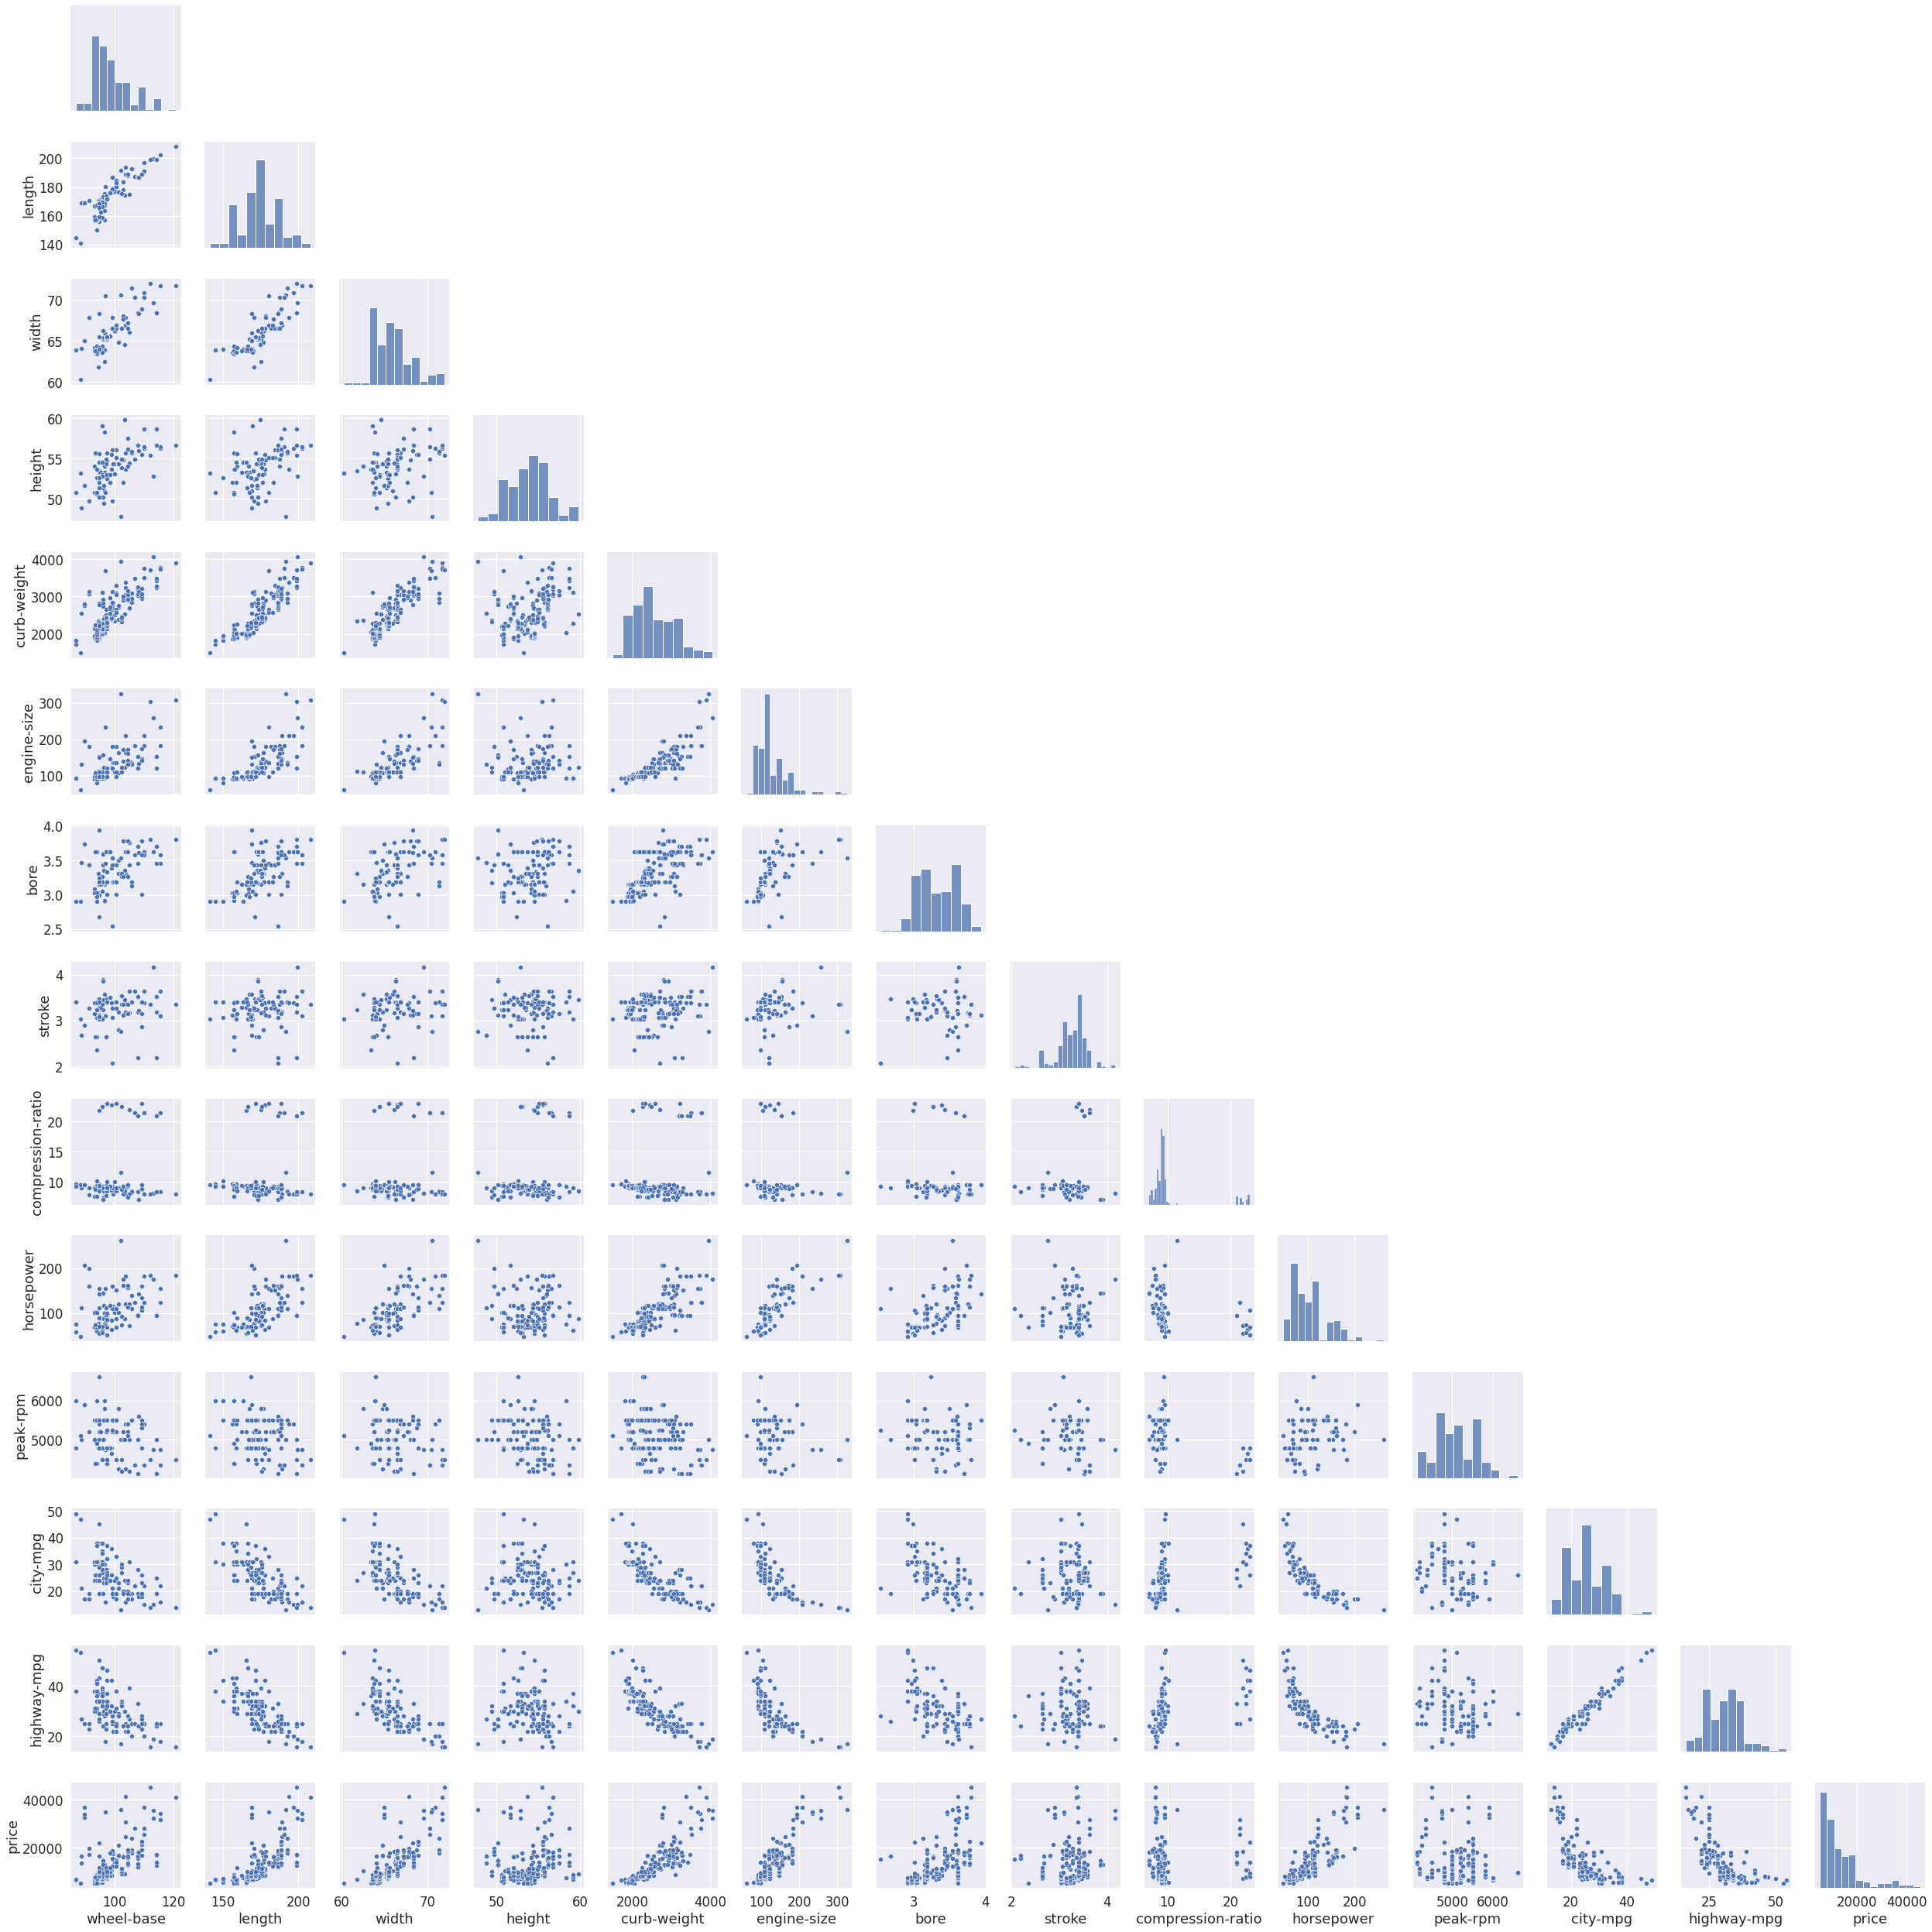

In [ ]:
# for this task we will be using a function "seaborn.pairplot" from seaborn python libarary (ref:https://seaborn.pydata.org/generated/seaborn.pairplot.html)

fig = plt.figure(figsize=(30,30)) #defining figure sive
sns.pairplot(Clean_automobile_dataset_13PV_1TV_df,corner=True) #ploting
plt.tight_layout()
#plt.savefig('Features_pairplot.png',bbox_inches="tight",dpi=300)
#files.download('Features_pairplot.png') 
plt.show()




## Question 1(e)
Identify, based on your pair-wise scatter plots, variables that are related and preferably would
not both (or all) be used in the model simultaneously.

**Answer:** Identifing,variables that are related and preferably would not both (or all) be used in the model simultaneously.

1.**wheel-base:**        
*   **Strong Postive relation** (*Recommended not to use both simultaneoughly in the same model*): **length, width, curb-weight.** 
*   **Medium Positive relation** (could consider using simultaneoughly in the same model) : height,bore
*   **Medium Negatibe relation** (could consider using simultaneoughly in the same model) : city-mpg, highway-mpg


2.**length:**
*   **Strong Postive relation** : wheel-base, width,curb-weight.
*   **Medium Positive relation** : engine-size, bore,horsepower
*   **Medium Negatibe relation** : city-mpg, highway-mpg


3.**weight:**
*   **Strong Postive relation** : wheel-base, length,curb-weight.
*   **Medium Positive relation** : engine-size, bore,horsepower
*   **Medium Negatibe relation** : city-mpg, highway-mpg

4.**curb-weight:**
*   **Strong Postive relation** : wheel-base, length,weight,engine-size.
*   **Medium Positive relation** : bore,horsepower
*   **Strong Negatibe relation**(*Recommended not to use both simultaneoughly in the same model*) : city-mpg, highway-mpg

5.**engine-size:**
*   **Strong Postive relation** :  curb-weight,horsepower
*   **Medium Positive relation** : wheel-base, length,weight,bore
*   **Medium Negatibe relation** : city-mpg, highway-mpg

6.**horsepower:**
*   **Strong Postive relation** : engine-size.
*   **Medium Positive relation** : bore,length,weight,curb-weight.
*   **Strong Negatibe relation**: city-mpg, highway-mpg

7.**city-mpg:**
*   **Strong Postive relation** : highway-mpg.
*   **Medium Positive relation** : bore,length,weight,curb-weight,engine-size.
*   **Strong Negatibe relation**: horsepower.

7.**highway-mpg:**
*   **Strong Postive relation** : city-mpg.
*   **Medium Positive relation** : bore,length,weight,curb-weight,engine-size.
*   **Strong Negatibe relation**: horsepower.



## Question 1(f)

Submit a PDF print-out of your code. (Submitting a URL for a cloud-based repository is insufficient.)

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.ipynb to html
[NbConvertApp] Writing 933818 bytes to /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.html


# Regression

Continuing with the 13 continuous predictor variables from the Automobile Data Set from the UCI Machine
Learning Repository to predict a car’s price from its characteristics:

## Question # 2 (a)

Based on your data exploration, propose 3 unique linear models (3 unique subsets of the 13
continuous features)5 for predicting a car’s price from its characteristics. If you noticed that for
some features there appears to be a nonlinear relationship between the feature and the car’s price,
such as price = feature2 or price = 1/feature, you may propose a model that uses a transformed
feature that you expect to capture the nonlinear relationship you observed. Limit each of your
proposed models to use no more than three features.
Explain why you proposed each of these


**Answer:** Based on the data exploration the three propossed models are listed below.



1. **Proposed linear model#1:** The first proposed linear model will utilize only one predictive feature called "engine-size" for the predictor car's price. The scatter plot generated in question #1(b) shows a strong positive relation between "engine-size" and car price. It will be interesting to see how accurate the regression using a single predictive variable would be.
2. **Proposed Linear model#2 (Multi linear regression):** The second proposed linear model is a multiple linear model and will utilize only two predictive features called "engine-size" and 'width' for the predictor car's price.the feature pairs plot generated in question #1(d), can be seen that "width" has a medium positive relative with both car's "price" and "engine-size." This model will explore the benefits of having a predictive variable having both strong and medium positively related to the target variable. Additionally, both predictive variables also have a medium positive relation.

3. **Proposed Linear model#3 (polynomial Regegression):** The third proposed linear model is a plynomial regression of 3rd degree and we will use the predictive features called "highway-mpg" to predict the car's price. Analyzing the scatter plot generated in question #1(b), it can be seen that highway-mpg has non-linear components againest pricing, polynominal model could be a potential fitting for price prediction. 



In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from numpy.lib import polynomial
# Linear regression
def lnr_reg(predictive_variable,target_variable,tr_ts_split=0.20,random_state=200):

  """
  inputs: a) predictive_variable = predictive variable/variables
          b) target_variable     = target variable
          c) Train-Test split    = tr_ts_split
          d) random_state        = int
  output:
      return R2 = coefficient of determination

  """

  x_train, x_test, y_train, y_test = train_test_split(predictive_variable, target_variable, test_size=0.20, random_state=1)
  print("Number of training sample = {:5d}".format(x_train.shape[0]))
  print("Number of test sample     = {:5d}".format(x_test.shape[0]))

  lnr_reg            = LinearRegression()
  lnr_reg.fit(x_train, y_train)
  lnr_reg_pred       = lnr_reg.predict(x_test)
  R2                 = lnr_reg.score(x_test, y_test)
  lnr_reg_intercept  = lnr_reg.intercept_
  lnr_reg_coefficent = lnr_reg.coef_
  name_predictive_variable      = predictive_variable.columns.values.tolist()
  print('The R_squared value={}'.format(R2))
  print('Intercept ={}, coefficient={}'.format(lnr_reg_intercept,lnr_reg_coefficent))
  print('Predictive Variable name={}'.format(name_predictive_variable ))

  plt.figure(figsize=(10, 8))
  plt.xlabel('price')
  plt.ylabel('predicted price')
  sns.scatterplot(y_test,lnr_reg_pred,color='brown')
  sns.lineplot(y_test,y_test,label='prˆice = price')
  plt.show()
  return R2


# polynomial Regression
def poly_reg(predictive_variable,target_variable,degree_of_poly=2,tr_ts_split=0.20,random_state=200):

  """
  inputs: a) predictive_variable = predictive variable/variables
          b) target_variable     = target variable
          c) Train-Test split    = tr_ts_split
          d) degree_of_poly      = polynomial degree
          d) random_state        = int
  output:
      return R2 = coefficient of determination

  """

  x_train, x_test, y_train, y_test = train_test_split(predictive_variable, target_variable, test_size=0.20, random_state=1)
  print("Number of training sample = {:5d}".format(x_train.shape[0]))
  print("Number of test sample     = {:5d}".format(x_test.shape[0]))

  poly = PolynomialFeatures(degree=degree_of_poly)

  x_train_poly = poly.fit_transform(x_train)
  x_test_poly  = poly.fit_transform(x_test)



  lnr_reg            = LinearRegression()
  lnr_reg.fit(x_train_poly, y_train)
  lnr_reg_pred       = lnr_reg.predict(x_test_poly)
  R2                 = lnr_reg.score(x_test_poly, y_test)
  lnr_reg_intercept  = lnr_reg.intercept_
  lnr_reg_coefficent = lnr_reg.coef_
  name_predictive_variable      = predictive_variable.columns.values.tolist()
  print('The R_squared value={}'.format(R2))
  print('Intercept ={}, coefficient={}'.format(lnr_reg_intercept,lnr_reg_coefficent))
  print('Predictive Variable name={}'.format(name_predictive_variable ))
  plt.figure(figsize=(10, 8))
  plt.xlabel('price')
  plt.ylabel('predicted price')
  sns.scatterplot(y_test,lnr_reg_pred,color='brown')
  sns.lineplot(y_test,y_test,label='prˆice = price')
  plt.show()
  return R2



## Question #2(b)

For your proposed model #1,
i. Perform linear regression to find the model parameters,6 and provide the specific model
(i.e., write down the equation prˆice = f (features,wˆ ) with the values for each element of wˆ
specified.
ii. What is R2 for this model?

iii. Scatter plot the predicted price as a function of the true price. Also plot the line prˆice = price
(the line representing perfect prediction) as a reference.
iv. What is your impression of this model? How do the predicted prices compare to the true
prices? Are there price ranges where the model is particularly good? Are there price ranges
where the model is particularly bad?

Proposed linear model#1

**Answer:** 

i) Linear regression was perform.

 $\hat{Price} = -8749.635824172943 + 172.78628415\times engine-size$

ii) The $R^2$ for this model is $0.8604561295504265$. It means 86.04% variation of the price is explained by this linear regression.

iii) Scatered plot is generated as instruted.

iv) As higher the $R^2$ value better the model, the model perform reasonablly well with a R value of $0.8604561295504265$, which means 86.04% variation of the price is explained by this linear regression. predicted price and true price shown a strong positive relation. the model performs extremely well prices ranges upto 15000. as the sampled are pretty tight around the line within this range.
Model performed comparatively low on a sample with the price around 37000. 



Number of training sample =   156
Number of test sample     =    39
The R_squared value=0.8604561295504265
Intercept =-8749.635824172943, coefficient=[172.78628415]
Predictive Variable name=['engine-size']


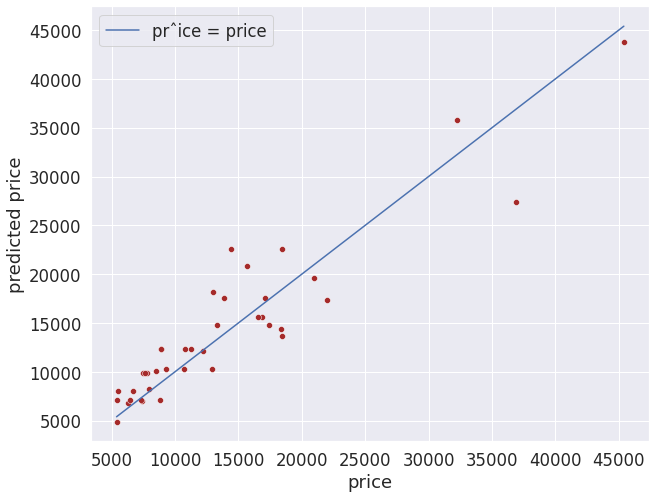

0.8604561295504265

In [ ]:
lnr_reg(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[['engine-size']],target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],tr_ts_split=0.20,random_state=200)

## Question #2(c)

For your proposed model #2,
i. Perform linear regression to find the model parameters,6 and provide the specific model
(i.e., write down the equation prˆice = f (features,wˆ ) with the values for each element of wˆ
specified.
ii. What is R2 for this model?

iii. Scatter plot the predicted price as a function of the true price. Also plot the line prˆice = price
(the line representing perfect prediction) as a reference.
iv. What is your impression of this model? How do the predicted prices compare to the true
prices? Are there price ranges where the model is particularly good? Are there price ranges
where the model is particularly bad?

Proposed linear model#2


**Answer: **

i) Linear regression (multiple linear regression) was perform.

$\hat{Price} = -54002.33511859234 + (741.60629206\times width) + (144.58037832\times engine-size)$  

ii) The $R^2$ for this model is $0.8820077987730103$. It means 88.20% variation of the price is explained by this linear regression.

iii) Scatered plot is generated as instruted.

iv) As higher the $R^2$ value better the model, the model perform reasonablly well with a R value of $0.8820077987730103$, which means 86.04% variation of the price is explained by this linear regression. predicted price and true price shown a strong positive relation. the model performs extremely well prices ranges upto 15000. as the sampled are pretty tight around the line within this range.
Model performed comparatively low on a sample with the price around 37000.
Proposed linear model#2 has outperformed the model with a 2% increase in $R^2$.

Number of training sample =   156
Number of test sample     =    39
The R_squared value=0.8820077987730103
Intercept =-54002.33511859234, coefficient=[741.60629206 144.58037832]
Predictive Variable name=['width', 'engine-size']


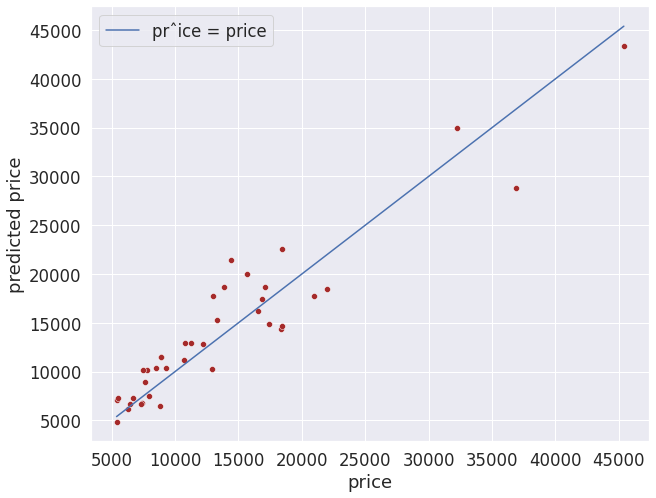

0.8820077987730103

In [ ]:
lnr_reg(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[['width','engine-size']],target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],tr_ts_split=0.20,random_state=200)

## Question #2(d)

For your proposed model #3,
i. Perform linear regression to find the model parameters,6 and provide the specific model
(i.e., write down the equation prˆice = f (features,wˆ ) with the values for each element of wˆ
specified.
ii. What is R2 for this model?

iii. Scatter plot the predicted price as a function of the true price. Also plot the line prˆice = price
(the line representing perfect prediction) as a reference.
iv. What is your impression of this model? How do the predicted prices compare to the true
prices? Are there price ranges where the model is particularly good? Are there price ranges
where the model is particularly bad?

**Answer:**
Proposed Linear model#3 (cubic polynomial)


i) Linear regression (cubic polynomial regression) was perform.

$\hat{Price} = 126385.53578 -7694.85241\times highway-mpg + 163.366526\times highway-mpg^2 -1.14447412\times highway-mpg^3$

ii) The $R^2$ for this model is $0.7461188252542726$. It means 74.61% variation of the price is explained by this linear regression.

iii) Scatered plot is generated as instruted.

iv) This cubic polynomial regression model showed lowest performance compared to proposed linear model#1 and model#2, with an $R^2$ of 

As higher the $R^2$ value better the model, the model perform reasonablly well with a R value of $0.7461188252542726$, which means 74.04% variation of the price is explained by this linear regression. predicted price and true price shown a medium positive relation. the model performs extremely well prices ranges upto 5000-10000. as the sampled are pretty tight around the line within this range.
Model performed is considerably The model performed is considerably flawed from the prices ranging 15000 to 22000.

Number of training sample =   156
Number of test sample     =    39
The R_squared value=0.7461188252542726
Intercept =126385.53578634774, coefficient=[ 0.00000000e+00 -7.69485241e+03  1.63366526e+02 -1.14447412e+00]
Predictive Variable name=['highway-mpg']


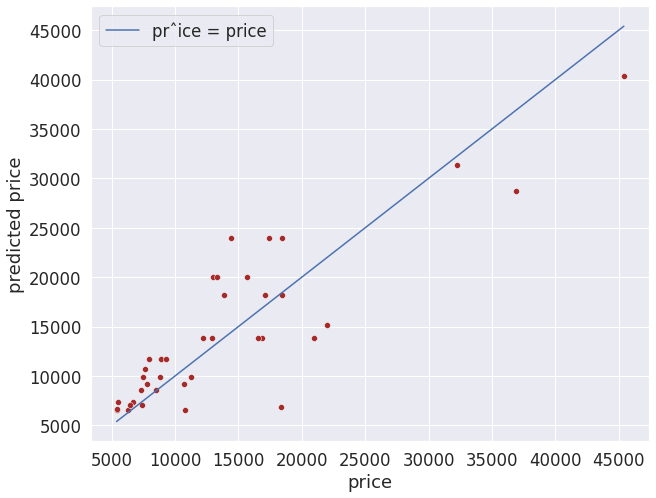

0.7461188252542726

In [ ]:
poly_reg(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[["highway-mpg"]],target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],degree_of_poly=3,tr_ts_split=0.20,random_state=200)

## Question #2(e)

Which of your three proposed models would you select? Explain your reasoning.

**Answer:**
Comparing my three proposed models, I will select proposed model#2 for precting prices. Higher the $R^2$ (coefficient of determination) better the line fitted to the data. Model#2 multiple linear regression has Best $R^2$ among these three.

## Question #2(f) 

Submit a PDF print-out of your code. (Submitting a URL for a cloud-based repository is insufficient.)

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.ipynb to html
[NbConvertApp] Writing 1753929 bytes to /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.html


## Question # 3

In the case of simple linear regression of y onto x, both the coefficient of determination, R2, and the
sample correlation between x and y, r, are measures of the linear relationship between x and y. It can
be shown in this case (simple linear regression) the coefficient of determination is equal to the square
of the sample correlation between y and y, $R^2 = r^2$.

## Question #3(a)

Does the equivalence between the coefficient of determination and the square of the sample
correlation extend to multiple linear regression (regression with more than one predictor, or
feature, variable)?

**Answer:** In case of multiple linear regression, the equivalence between the coefficient of determination and the square of the sample
correlation doen't hold. The reason is that in multiple linear regression models we have more than one predictive variables and $r$ can't calculate corellation more than $2$ variables.

## QUestion #3(b)
What does $R^2$ provide that $r$ (or $r^2$) does not?

**Answer:** r the correlation coeffient provies the estimate of the linear relation between 2 variable and can be between the number -1 to 1 depending on the strength of the relationship. correlation coeffient can only be estimated bwteen two variables.

Where as $R^2$ is the measurement of the variance can be explained by the fitted regression. We can estimate the $R^2$ in multi-variable senario (predictive variable >1) using square of the correlation between the predicted values of the regression and target variable.



In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.ipynb to html
[NbConvertApp] Writing 1754671 bytes to /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HW1/HW1_ECE580_Fakrul_Islam_Tushar.html
